# Medicare 
In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. 
Source: https://en.wikipedia.org/wiki/Medicare_(United_States)

The federal health insurance program for :
People who are 65 or older

Certain younger people with disabilities 

People with End-Stage Renal Disease (permanent kidney failure requiring dialysis or a transplant, sometimes called ESRD)


# Parts of Medicare
The different parts of Medicare help cover specific services

### Medicare Part A (Hospital Insurance)
Part A covers inpatient hospital stays, care in a skilled nursing facility, hospice care, and some home health care.
### Medicare Part B (Medical Insurance)
Part B covers certain doctors' services, outpatient care, medical supplies, and preventive services.
### Medicare Part D (prescription drug coverage)
Helps cover the cost of prescription drugs (including many recommended shots or vaccines)

#### Dataset used is from this kaggle dataset: https://www.kaggle.com/datasets/cms/cms-medicare/data

We will start by analyzing the Part D prescription in 2014

In [1]:
# Import the required libraries 

from bq_helper import BigQueryHelper
import bq_helper
# from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
# import plotly.plotly as py
from plotly import tools

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
init_notebook_mode(connected=True)

medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [2]:
bq_assistant.list_tables()

['home_health_agencies_2013',
 'home_health_agencies_2014',
 'hospice_providers_2014',
 'hospital_general_info',
 'inpatient_charges_2011',
 'inpatient_charges_2012',
 'inpatient_charges_2013',
 'inpatient_charges_2014',
 'inpatient_charges_2015',
 'nursing_facilities_2013',
 'nursing_facilities_2014',
 'outpatient_charges_2011',
 'outpatient_charges_2012',
 'outpatient_charges_2013',
 'outpatient_charges_2014',
 'outpatient_charges_2015',
 'part_d_prescriber_2014',
 'physicians_and_other_supplier_2012',
 'physicians_and_other_supplier_2013',
 'physicians_and_other_supplier_2014',
 'physicians_and_other_supplier_2015',
 'referring_durable_medical_equip_2013',
 'referring_durable_medical_equip_2014']

In [3]:
bq_assistant.head("part_d_prescriber_2014", num_rows=15)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65,total_30_day_fill_count,total_30_day_fill_count_ge65
0,1003079328,PAULEY,KAREN,MARION,OH,Physician Assistant,S,METFORMIN HCL,METFORMIN HCL,22.0,...,3990,593.80,None,#,None,#,None,None,133.0,None
1,1003847450,TURNER,RICHARD,PARADISE,CA,Family Practice,S,ENALAPRIL MALEATE,ENALAPRIL MALEATE,NaN,...,2880,455.51,None,#,None,#,None,None,96.0,None
2,1003882622,LEHMAN,MARYKAY,GRAND RAPIDS,MI,Pulmonary Disease,S,ADVAIR DISKUS,FLUTICASONE/SALMETEROL,15.0,...,2340,24406.00,None,#,None,#,None,None,78.0,None
3,1003989492,SHAH,PANNA,PATCHOGUE,NY,Family Practice,S,LEVOTHYROXINE SODIUM,LEVOTHYROXINE SODIUM,20.0,...,2460,656.19,None,#,None,#,None,None,83.0,None
4,1013934645,LILES,JERRY,ALICE,TX,Family Practice,S,LANTUS SOLOSTAR,"INSULIN GLARGINE,HUM.REC.ANLOG",25.0,...,4903,63630.74,None,#,None,#,None,None,168.1,None
5,1013969583,COPPOLA,JOSEPH,BRADENTON,FL,Family Practice,S,GABAPENTIN,GABAPENTIN,14.0,...,1567,520.68,None,#,None,#,None,None,53.0,None
6,1023010683,ZAVALETA,JESUS,MCALLEN,TX,Family Practice,S,FUROSEMIDE,FUROSEMIDE,18.0,...,3185,221.03,None,#,None,#,None,None,107.2,None
7,1033165295,PRASAD,LAKSHMI,WARREN,NJ,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,13.0,...,2173,649.60,None,#,None,#,None,None,72.4,None
8,1043202914,WILSON,WILLIAM,FORT WAYNE,IN,Cardiology,S,CRESTOR,ROSUVASTATIN CALCIUM,36.0,...,8549,51417.70,None,#,None,#,None,None,286.0,None
9,1043270044,SNODGRASS,GREGORY,GAINESVILLE,FL,Ophthalmology,S,LATANOPROST,LATANOPROST,34.0,...,6764,2552.27,None,#,None,#,None,None,235.9,None


In [4]:
bq_assistant.table_schema("part_d_prescriber_2014")

,name,type,mode,description
0,npi,STRING,REQUIRED,National Provider Identifier
1,nppes_provider_last_org_name,STRING,NULLABLE,Last Name/Organization Name of the Provider
2,nppes_provider_first_name,STRING,NULLABLE,First Name of the Provider
3,nppes_provider_city,STRING,NULLABLE,City of the Provider
4,nppes_provider_state,STRING,NULLABLE,State Code of the Provider
5,specialty_description,STRING,NULLABLE,Provider Specialty Type
6,description_flag,STRING,NULLABLE,Source of Provider Specialty
7,drug_name,STRING,REQUIRED,Name of the drug
8,generic_name,STRING,NULLABLE,Generic name of the drug
9,bene_count,INTEGER,NULLABLE,Number of Medicare Beneficiaries


## 1. Which state has highest total claim in millions

In [5]:
query1 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC
LIMIT
  5;
        """
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)

,state,total_claim_count_millions
0,CA,116.0
1,FL,91.0
2,NY,80.0
3,TX,76.0
4,PA,63.0


## 2. For which disease are the most drugs claimed

### 2. a. Which drug is claimed the most and how much cost is covered through Medicare

In [6]:
# How many nurrsing facilitins in different States 
query2 = """SELECT
drug_name, ROUND(SUM(total_claim_count) / 1e6) as total_claims_million, ROUND(SUM(total_drug_cost) / 1e6) AS drug_cost_million
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
  GROUP BY 
  drug_name
ORDER BY
  sum(total_claim_count) DESC;"""
response2 = medicare.query_to_pandas_safe(query2)
response2.head(5)

,drug_name,total_claims_million,drug_cost_million
0,LISINOPRIL,38.0,277.0
1,LEVOTHYROXINE SODIUM,37.0,621.0
2,AMLODIPINE BESYLATE,36.0,299.0
3,SIMVASTATIN,34.0,341.0
4,OMEPRAZOLE,32.0,518.0


Medicare Part D covers the cost of prescription. But the medicines covered are defined and if the drug prescribed is not covered a generic alternative of the same drug is covered under Medicare. If both are coverved Medicare beneficiaries can decide which one of the medicine they want to buy.

Generic drugs are generally less expensive than their brand-name counterparts, and they often have the same active ingredients and therapeutic effects. Medicare encourages the use of generic drugs when they are available and medically appropriate as a way to control costs for both the beneficiary and the Medicare program.

So we need to check the claims made with respect to generic drug i.e. generic drug with the total cost of the drug.

### 2. b. Which generic drug is claimed the most and how much cost is covered through Medicare

In [7]:
query3 = """SELECT
generic_name, ROUND(SUM(total_claim_count) / 1e6) as total_claims_million, ROUND(SUM(total_drug_cost) / 1e6) AS drug_cost_million
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
  GROUP BY 
  generic_name
ORDER BY
  sum(total_claim_count) DESC;"""
response3 = medicare.query_to_pandas_safe(query3)
response3.head(5)

,generic_name,total_claims_million,drug_cost_million
0,LEVOTHYROXINE SODIUM,42.0,831.0
1,LISINOPRIL,38.0,278.0
2,AMLODIPINE BESYLATE,36.0,302.0
3,SIMVASTATIN,34.0,343.0
4,HYDROCODONE/ACETAMINOPHEN,32.0,669.0


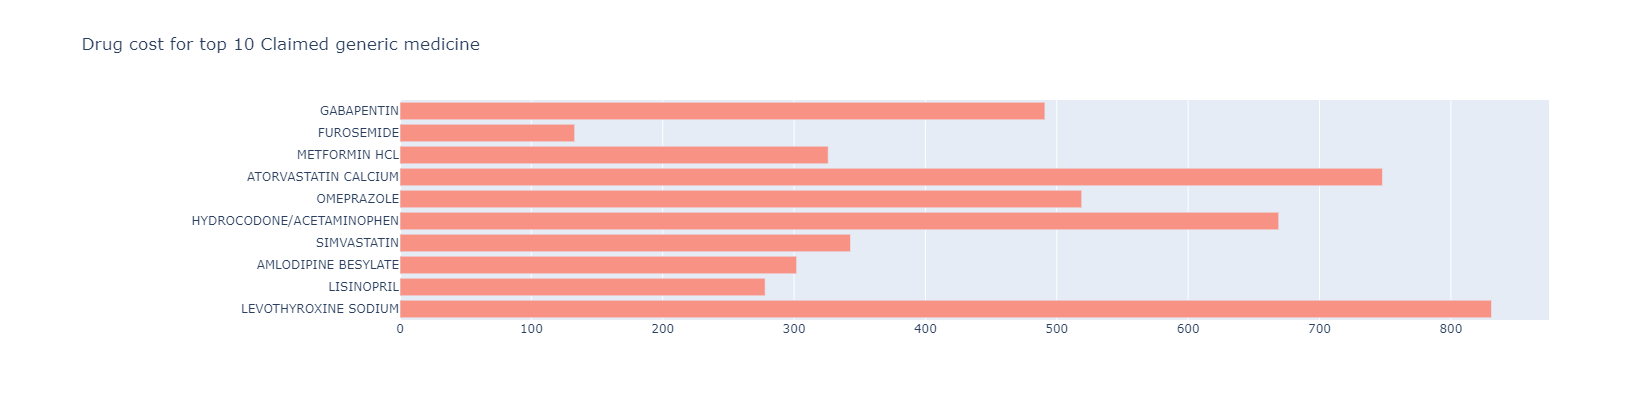

In [8]:
df = response3.head(10)
y = df.generic_name
x = df.drug_cost_million
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f79284'),)
layout = dict(height=400, width=700, margin=dict(l=400), title='Drug cost for top 10 Claimed generic medicine')
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

With this data we can see that for these drugs, most number of claims have been made.
From this we can conclude what is the most common sort of disease majority of people are facing 

LEVOTHYROXINE SODIUM: hypothyroidism (underactive thyroid - a condition where the thyroid gland does not produce enough thyroid hormone). Levothyroxine is also used in adults along with surgery and radioactive iodine therapy to treat a certain type of thyroid cancer (Throid issues)

LISINOPRIL - It is widely used to treat high blood pressure and heart failure and may be prescribed after a heart attack. It also lowers the chances of having a heart attack or stroke. (Heart Attack/Blood Pressure)

AMLODIPINE BESYLATE: Amlodipine is a calcium channel blocker that treats high blood pressure and prevents chest pain (angina). It is used to lower high blood pressure, which helps prevent strokes, heart attacks, and kidney problems. (Blood Pressure/Kidney)

SIMVASTATIN:  It is used to lower cholesterol and to reduce the risk of heart disease. (Cholesterol/Heart disease)

HYDROCODONE/ACETAMINOPHEN :May be used to relieve moderate-to-moderately severe pain unresponsive to other treatment options.

OMEPRAZOLE: Omeprazole is a medicine that reduces the amount of acid produced in your stomach. It helps treat acid-related diseases of the stomach and intestine such as heartburn, acid reflux, and peptic ulcer disease. (Stomach ache/Heartburn/Ulcers)

#### Here we can conclude that majority of the people making a claim suffer from Heart and Thyroid related issues

<center>
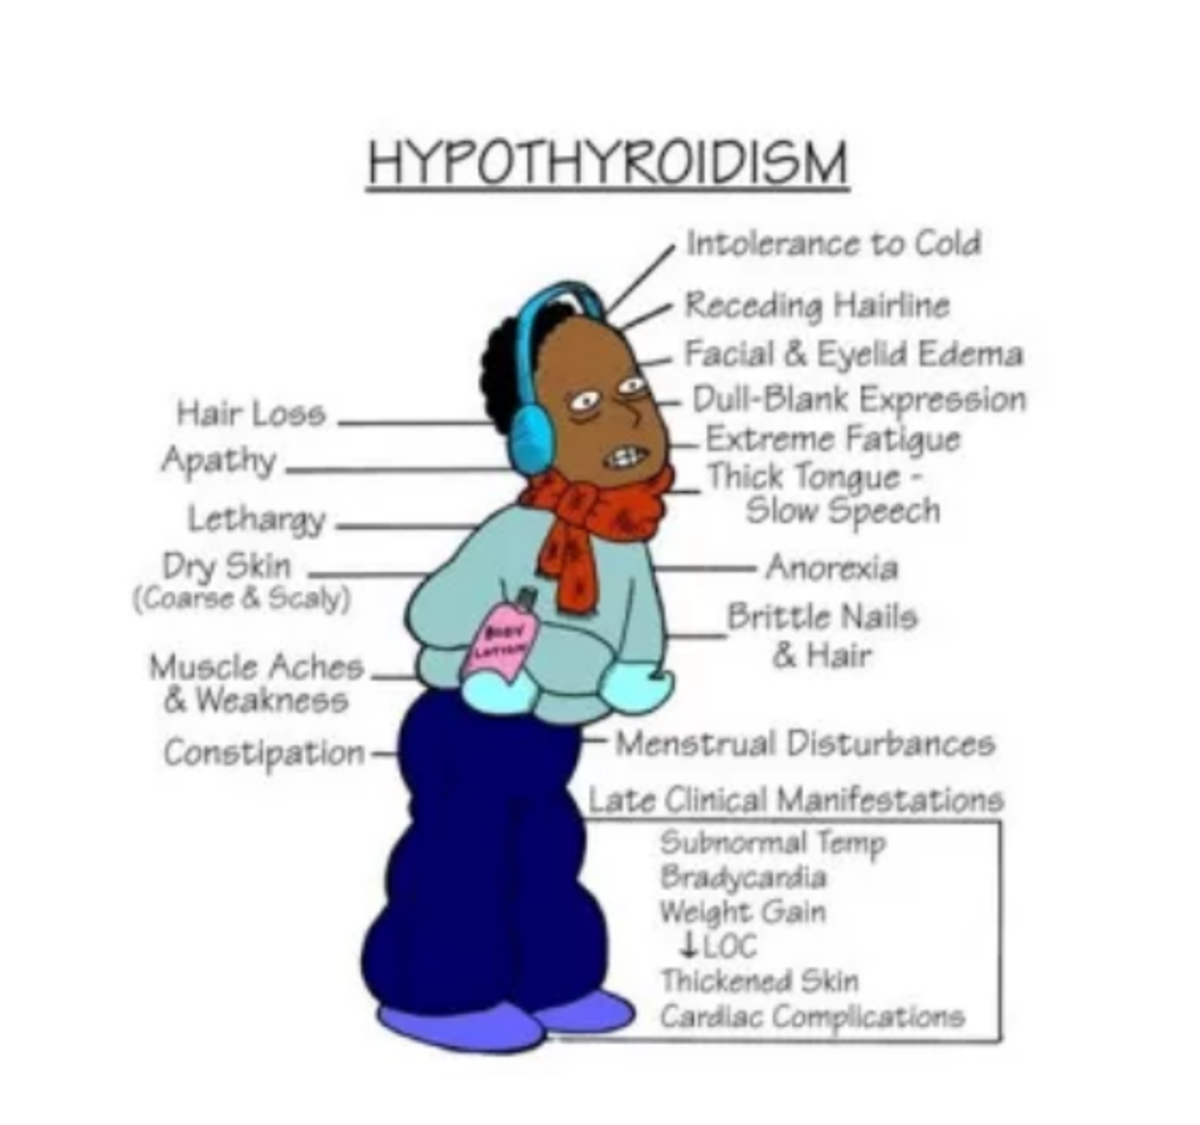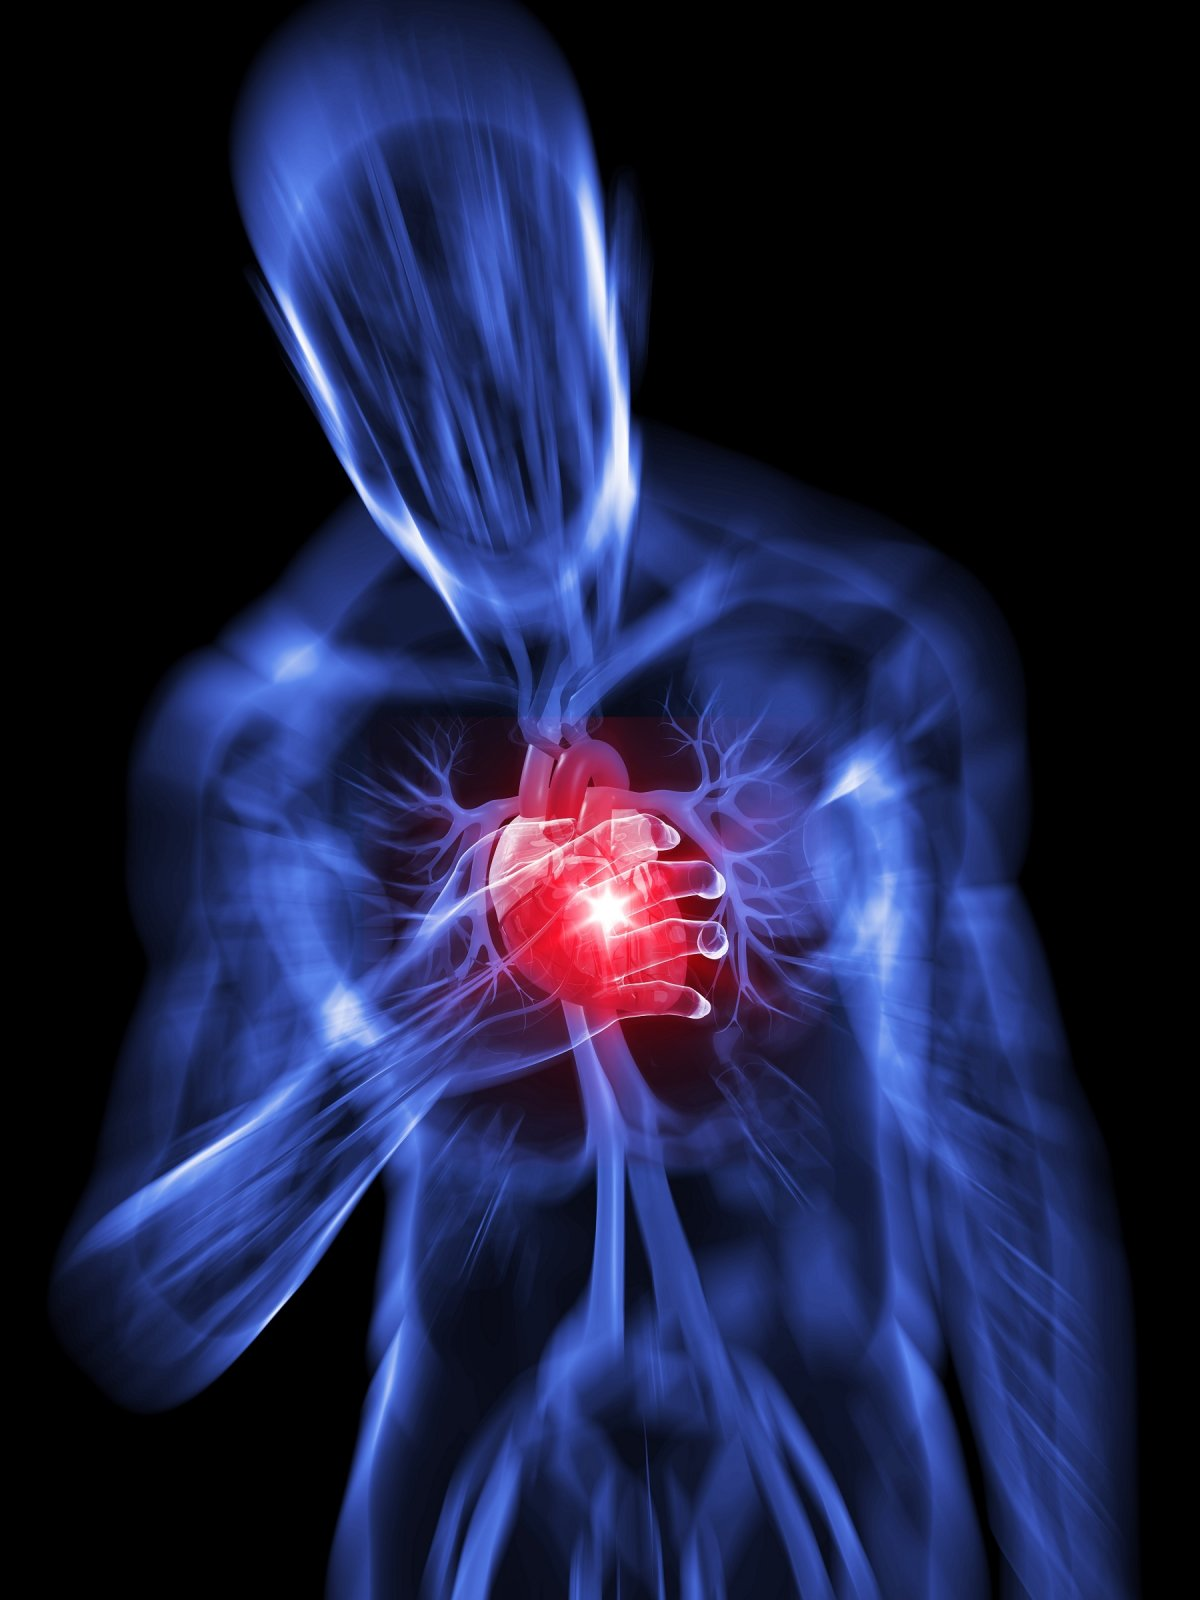

## 3. Brand name vs Generic medicine

In [9]:
query4 = """SELECT count(distinct(generic_name)) AS total_generic_drug_count
FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
"""
query5 = """SELECT count(distinct(drug_name)) AS total_drug_count
FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
"""

response4 = medicare.query_to_pandas_safe(query4)
print("Total generic drugs distinct count " + str(response4.iloc[0]['total_generic_drug_count']))
response5 = medicare.query_to_pandas_safe(query5)
print("Total prescribed drugs distinct count " + str(response5.iloc[0]['total_drug_count']))

Total generic drugs distinct count 1539
Total prescribed drugs distinct count 2703


In [10]:
query6 = """
SELECT generic_name, STRING_AGG(DISTINCT(drug_name)) AS drug_names, COUNT(DISTINCT(drug_name)) AS count_drug_name
FROM `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY generic_name
HAVING COUNT(DISTINCT drug_name) > 1
ORDER BY COUNT(DISTINCT(drug_name)) DESC;
"""
response6 = medicare.query_to_pandas_safe(query6)
response6

,generic_name,drug_names,count_drug_name
0,"NEEDLES, INSULIN DISPOSABLE","BD ULTRA-FINE PEN NEEDLE,NOVOFINE 32,ULTICARE,...",29
1,"SYRINGE & NEEDLE,INSULIN,1 ML","INSULIN SYRINGE,ULTRA COMFORT,SURE COMFORT,EAS...",26
2,"SYRING W-NDL,DISP,INSUL,0.5 ML","EASY TOUCH,MONOJECT INSULIN SYRINGE,PRODIGY IN...",23
3,"SYRING W-NDL,DISP,INSUL,0.3 ML","ULTILET INSULIN SYRINGE,COMFORT EZ,SAFETYGLIDE...",22
4,LEVONORGESTREL-ETHIN ESTRADIOL,"ALTAVERA,ORSYTHIA,ENPRESSE,PORTIA,AVIANE,TRIVO...",18
...,...,...,...
608,CLINDAMYCIN PHOSPHATE/D5W,"CLEOCIN PHOSPHATE IN D5W,CLINDAMYCIN PHOSPHATE...",2
609,ETOPOSIDE,"TOPOSAR,ETOPOSIDE",2
610,BETAMET ACET/BETAMET NA PH,"BETAMETHASONE ACETATE-SOD PHOS,CELESTONE",2
611,CEFTIBUTEN DIHYDRATE,"CEFTIBUTEN,CEDAX",2


As we saw above in Query 1 and 5 how massively the cost of drug as well as number of claims changed for generic drug vs prescribed drug. This can be further validated with this table.

If the prescribed medicine is not covered under Medicare, Part D coveres the different drugs that doctors prescribe using these generic medicines.

## 4. Statewise highest claims, total day supply and drug cost 

In [11]:
query7 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC;
        """
response7 = medicare.query_to_pandas_safe(query7)
response7.head(10)

,state,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,CA,116.0,4935.0,9633.0
1,FL,91.0,3769.0,6970.0
2,NY,80.0,3150.0,7522.0
3,TX,76.0,3105.0,6462.0
4,PA,63.0,2402.0,4842.0
5,OH,53.0,2181.0,4051.0
6,NC,46.0,1706.0,3358.0
7,IL,43.0,1724.0,3121.0
8,GA,39.0,1403.0,2787.0
9,MI,39.0,1797.0,3193.0


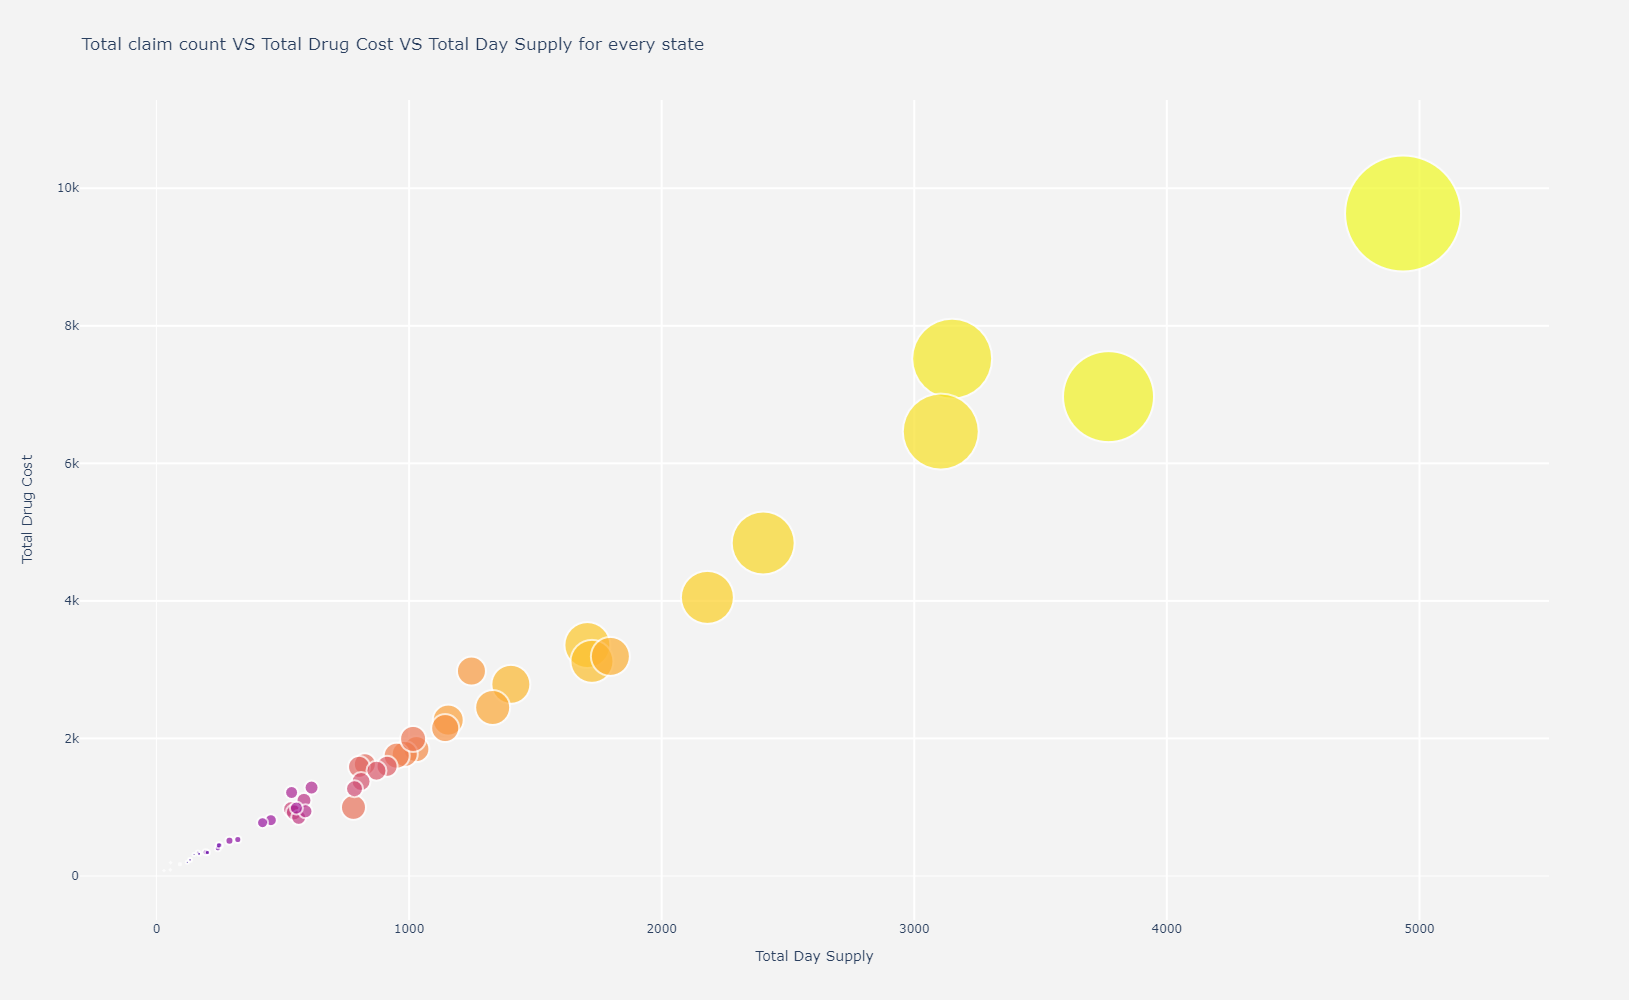

In [12]:
trace1 = go.Scatter(
    x=response7.total_day_supply_millions,
    y=response7.total_drug_cost_millions,
    mode='markers',
    text=response7.state,
    marker=dict(
        color=list(reversed([i*11 for i in range(200,251)])),
        size=response7.total_claim_count_millions,
        line=dict(
            width=2
        ),
    )
)
data = [trace1]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    title='Total claim count VS Total Drug Cost VS Total Day Supply for every state',
    xaxis=dict(
        title='Total Day Supply',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Total Drug Cost',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter-colorscale')

California has the most number of claims made, day supplies as well as the drug cost
Florida, New York and Texas are the next states with highest claims.

In case of florida even though the claims made are higher than New York still the total drug cost is less which signifies that either the drugs were of low cost or people in Florida might have preferred generic over brand name medicines.

## 5. Specialty wise total drug cost, total claims and total supply day

In [13]:
query8 = """SELECT
  specialty_description AS specialty_description,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  specialty_description
ORDER BY
  total_claim_count_millions DESC;
        """
response8 = medicare.query_to_pandas_safe(query8)
tempdf = response8.head(40)
tempdf['specialty_description1'] = tempdf['specialty_description'].apply(lambda x: x.replace(" ","_"))
tempdf

,specialty_description,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions,specialty_description1
0,Internal Medicine,386.0,16340.0,22983.0,Internal_Medicine
1,Family Practice,361.0,14967.0,18254.0,Family_Practice
2,Nurse Practitioner,78.0,2873.0,6402.0,Nurse_Practitioner
3,Cardiology,67.0,3401.0,4039.0,Cardiology
4,Psychiatry,41.0,1307.0,4191.0,Psychiatry
5,Physician Assistant,40.0,1493.0,3020.0,Physician_Assistant
6,General Practice,30.0,1046.0,1425.0,General_Practice
7,Ophthalmology,24.0,816.0,2135.0,Ophthalmology
8,Neurology,19.0,696.0,5087.0,Neurology
9,Nephrology,14.0,575.0,1825.0,Nephrology


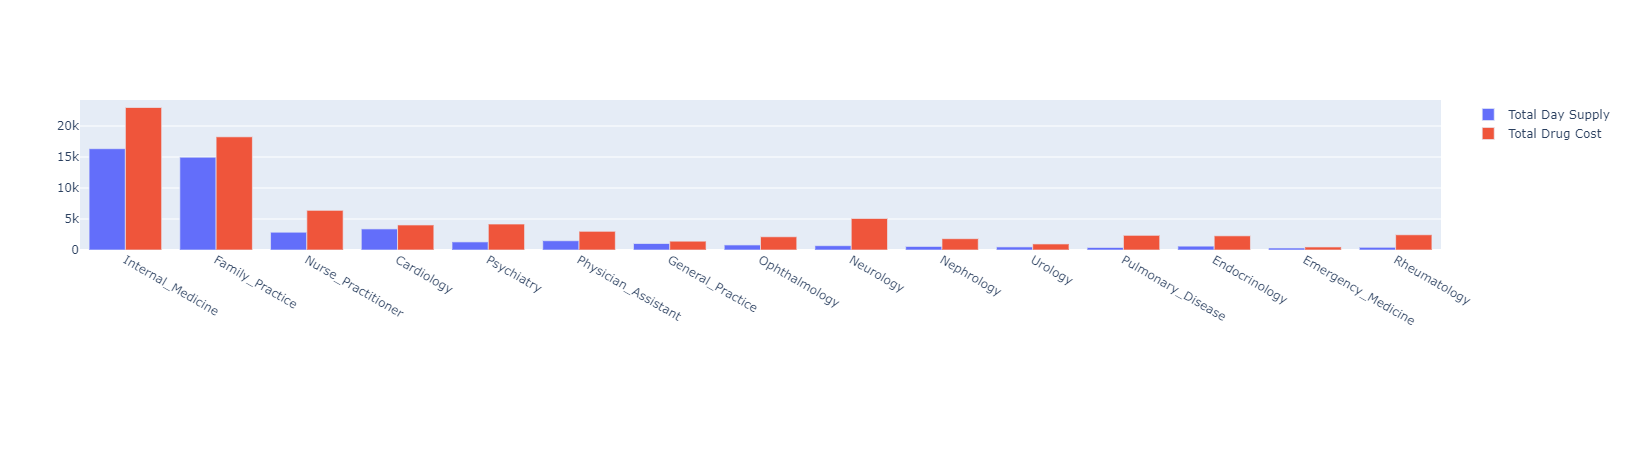

In [14]:
trace1 = go.Bar(
    x=tempdf.specialty_description1[:15],
    y=tempdf.total_day_supply_millions[:15],
    name='Total Day Supply'
)
trace2 = go.Bar(
    x=tempdf.specialty_description1[:15],
    y=tempdf.total_drug_cost_millions[:15],
    name='Total Drug Cost'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
    , margin=dict(b=200)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

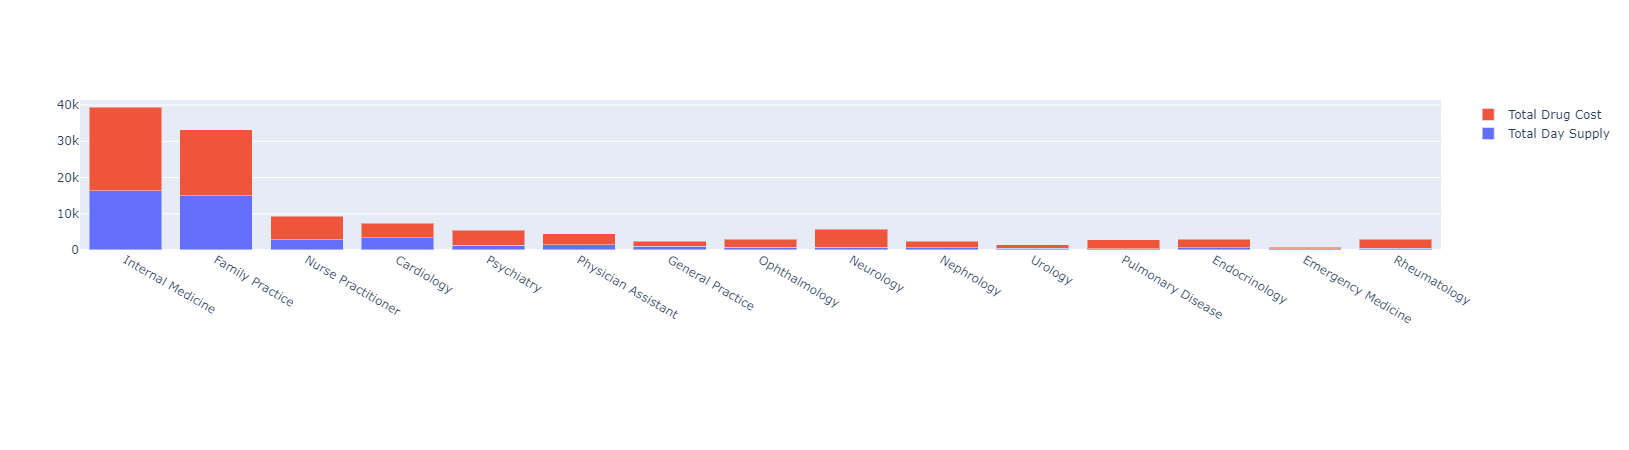

In [15]:
trace1 = go.Bar(
    x=tempdf.specialty_description[:15],
    y=tempdf.total_day_supply_millions[:15],
    name='Total Day Supply'
)
trace2 = go.Bar(
    x=tempdf.specialty_description[:15],
    y=tempdf.total_drug_cost_millions[:15],
    name='Total Drug Cost'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
    , margin=dict(b=200)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

From this graphs we can see Internal Medicine has the most number of claims and the total drug cost as well as total day supply is also the highest.

While the case of Emergency Medicine is different even in comparison to the specialities near it itnhas low drug cost and number of day supplies. i.e. Inspite of the claims being made for Emergency the overall cost and day supply is less.

## 6. Which drugs are most prescribed in each state

In [16]:
query9 = """select A.state, B.drug_name, A.MaxClaimCount from (select state, MAX(total_claim_count_millions) as MaxClaimCount from (
SELECT
  nppes_provider_state AS state, generic_name AS drug_name, SUM(total_claim_count) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY state, drug_name
ORDER BY
  total_claim_count_millions DESC) group by state) A INNER JOIN (SELECT
  nppes_provider_state AS state,
  generic_name AS drug_name,
  SUM(total_claim_count) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state, drug_name
ORDER BY
  total_claim_count_millions DESC) B ON A.MaxClaimCount = B.total_claim_count_millions;
"""
response9 = medicare.query_to_pandas_safe(query9)

visited = {}
rows = []
for index, row in response9.iterrows():
    stat = row['state']
    if stat not in visited:
        visited[stat] = 1
        rows.append(row)
newDF = pd.DataFrame(rows).reset_index()
newDF[['state', 'drug_name', 'MaxClaimCount']]

,state,drug_name,MaxClaimCount
0,MD,LISINOPRIL,463341
1,CA,LEVOTHYROXINE SODIUM,3844722
2,TX,HYDROCODONE/ACETAMINOPHEN,2833795
3,IA,LEVOTHYROXINE SODIUM,573383
4,GA,AMLODIPINE BESYLATE,1282226
...,...,...,...
56,MS,HYDROCODONE/ACETAMINOPHEN,623289
57,VT,LISINOPRIL,74747
58,AL,HYDROCODONE/ACETAMINOPHEN,1214392
59,SD,LEVOTHYROXINE SODIUM,157701


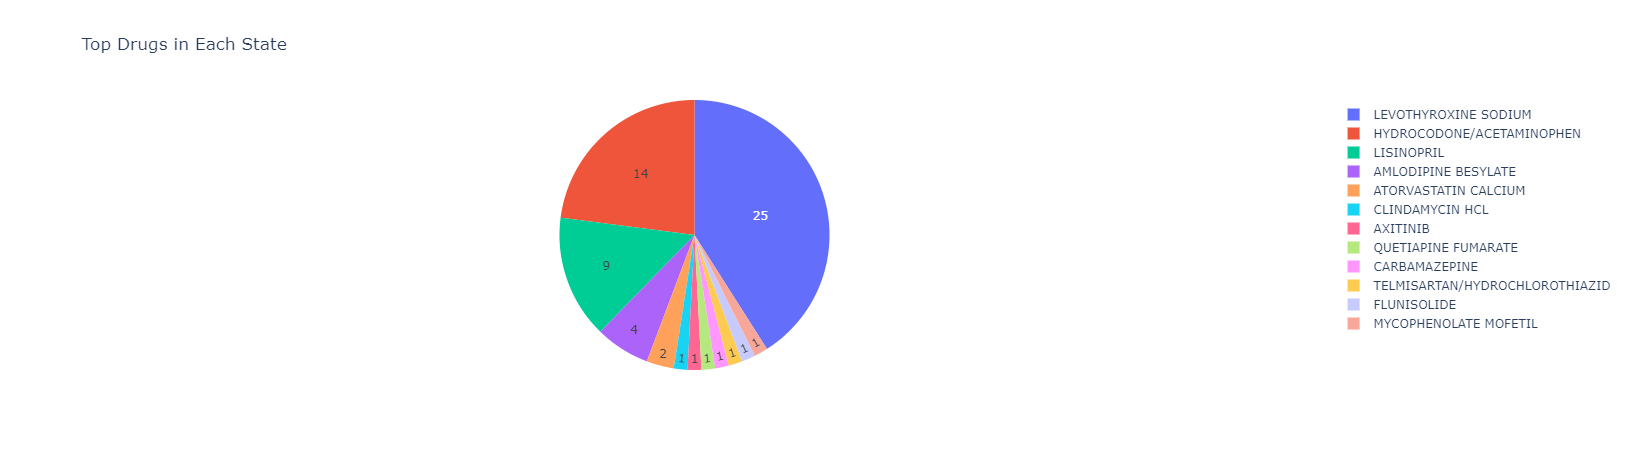

In [17]:
a = newDF['drug_name'].value_counts()
labels = a.index
values = a.values
# colors = ['lightblue','gray','#eee','#999', '#9f9f']
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', 
               textinfo='value', name='Top Drugs Used')
layout = dict(title = 'Top Drugs in Each State',
              xaxis= dict(title= 'Drug Name', ticklen= 5,zeroline= False),
              width=800
             )
fig = dict(data = [trace], layout = layout)
iplot(fig)

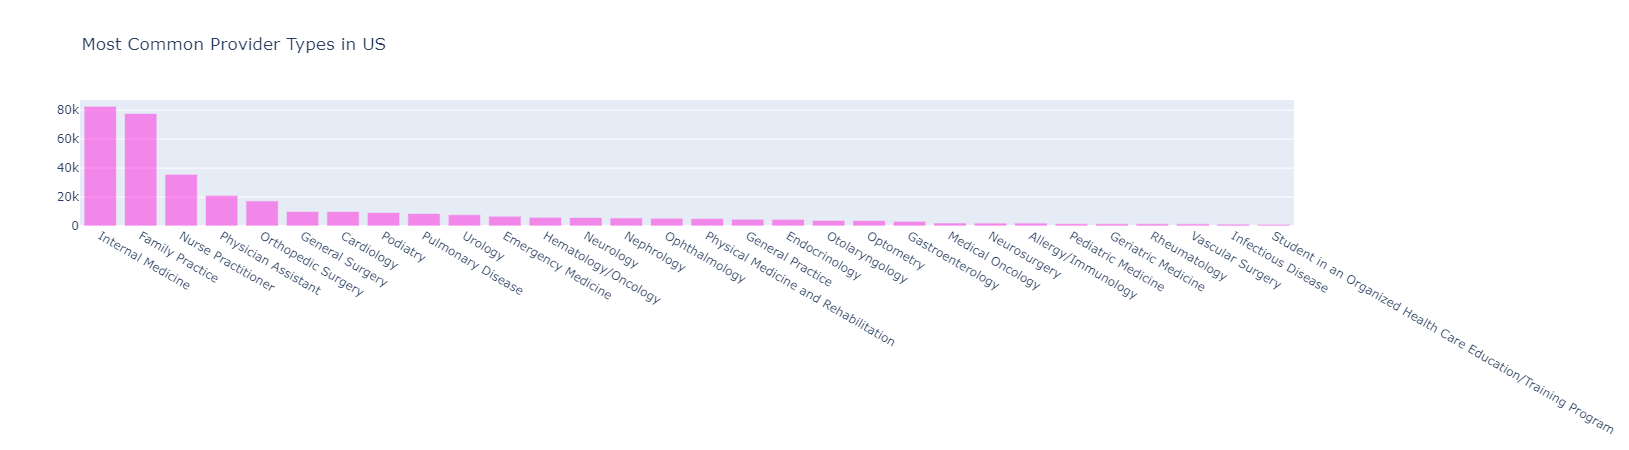

In [18]:
query10 = """SELECT provider_type, COUNT(provider_type) as count FROM
  `bigquery-public-data.cms_medicare.referring_durable_medical_equip_2014`
  GROUP BY provider_type ORDER BY count DESC;"""
response10 = medicare.query_to_pandas_safe(query10)

trace1 = go.Bar(x=list(response10.head(30)['provider_type']),
    y=list(response10.head(30)['count']),
    name='Popular Provider Types ',
    marker=dict(color='#ff23de'), opacity=0.5,
)

data = [trace1]
layout = go.Layout(
    barmode='group',
    title='Most Common Provider Types in US',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Nursing Facilities statewise

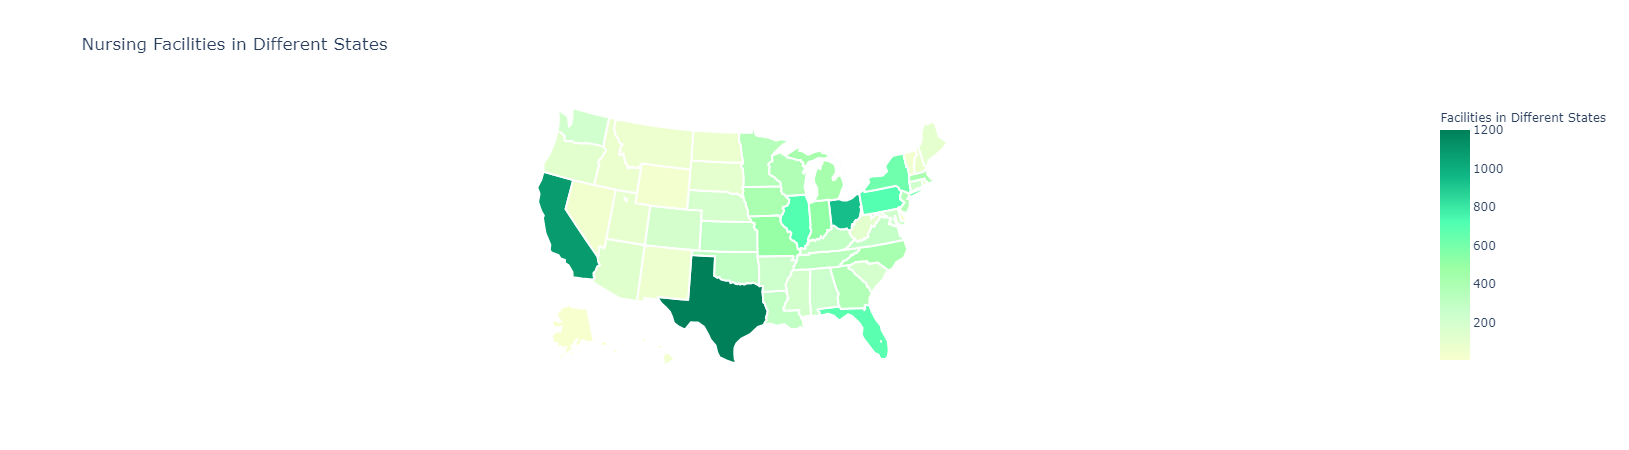

In [20]:
scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
query11 = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
response11 = medicare.query_to_pandas_safe(query11)
response11.head(10)
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = response1.state,
        z = response11.total_facilities,
        locationmode = 'USA-states',
        text = response11.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Facilities in Different States")
        )
       ]

layout = dict(
        title = 'Nursing Facilities in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

Texas has the most nursing facilities i.e. 1200 which is followed by California 1084 While Alaska has the least Nursing facilities i.e. 7

Hierarchical condition categories (HCC) are the groups of diagnoses you have that directly impact how much it costs your Medicare Advantage plan to take care of you. By addressing HCCs, you can help move the needle on rising healthcare costs.
Higher categories represent higher predicted healthcare costs, resulting in higher risk scores.

CMS states that higher HCC scores means there is higher risk of chronic diseases while lower hcc indicates healthy population. It will be interesting to see what is the average hcc score for different states and facilities.



In [21]:
query12 = """SELECT
  state, AVG(average_hcc_score) as avg_hcc_score, Max(average_hcc_score) as max_hcc_score, Min(average_hcc_score) as min_hcc_score, COUNT(average_hcc_score) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  avg_hcc_score DESC;
        """
response12 = medicare.query_to_pandas_safe(query12)
response12.head(10)

,state,avg_hcc_score,max_hcc_score,min_hcc_score,total_facilities
0,CA,2.612878,9.15,1.11,1084
1,LA,2.557959,4.91,1.39,294
2,NJ,2.555961,5.36,1.53,359
3,TX,2.545792,5.75,1.23,1200
4,FL,2.514390,5.70,1.11,688
5,NV,2.513182,4.73,1.49,44
6,MI,2.504481,7.12,1.20,424
7,OH,2.454872,7.07,0.85,936
8,GA,2.449700,4.31,1.30,367
9,AZ,2.415435,5.42,1.27,138


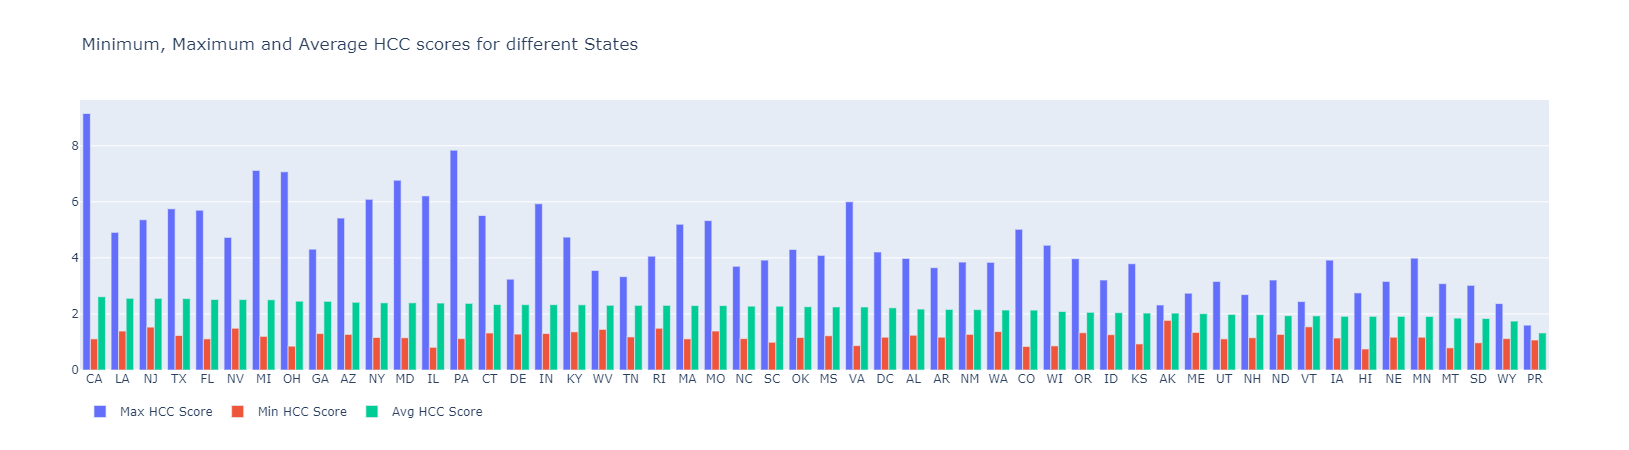

In [24]:
trace1 = go.Bar(
    x=response12.state,
    y=response12.max_hcc_score,
    name='Max HCC Score'
)
trace2 = go.Bar(
    x=response12.state,
    y=response12.min_hcc_score,
    name='Min HCC Score'
)
trace3 = go.Bar(
    x=response12.state,
    y=response12.avg_hcc_score,
    name='Avg HCC Score'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title='Minimum, Maximum and Average HCC scores for different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

The average HCC is in the state of the California i.e. 2.612 while the lowest average HCC score is in the state of Puerto Rico i.e. 1.32

California has one instance of very high HCC score 9.15 and Hawaii has the lowest minimum HCC score of 0.75

## Nursing facilities with High Average HCC score

In [25]:
query13 = """SELECT facility_name, city, state, average_hcc_score
FROM `bigquery-public-data.cms_medicare.nursing_facilities_2014`
ORDER BY average_hcc_score DESC;
        """
response13 = medicare.query_to_pandas_safe(query13)
response13.head(5)

,facility_name,city,state,average_hcc_score
0,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,9.15
1,FOX SUBACUTE AT MECHANICSBURG,MECHANICSBURG,PA,7.84
2,OMNI CONTINUING CARE,DETROIT,MI,7.12
3,ORCHARDS OF RIDGEWOOD LIVING & REHAB CTR THE,AKRON,OH,7.07
4,MANORCARE HEALTH SYSTEM - ADELPHI,ADELPHI,MD,6.77


In CA state one facility has a very high average HCC score, while the average HCC of CA is 2.61

In [26]:
response13.tail(5)

,facility_name,city,state,average_hcc_score
15021,MERCER COUNTY JOINT TOWNSHIP COMMUNITY HOSPITAL,COLDWATER,OH,0.85
15022,ST ANTHONY SUMMIT MEDICAL CENTER,FRISCO,CO,0.84
15023,ALDEN ESTATES OF SKOKIE,SKOKIE,IL,0.81
15024,POWDER RIVER MANOR,BROADUS,MT,0.79
15025,KFH - MALAMA 'OHANA NURSING AND REHAB CENTER,HONOLULU,HI,0.75


OH state has a facility with the lowest average HCC score of 0.85 while the average HCC score of OH state is 2.45

## Statewise Male vs Female beneficiaries

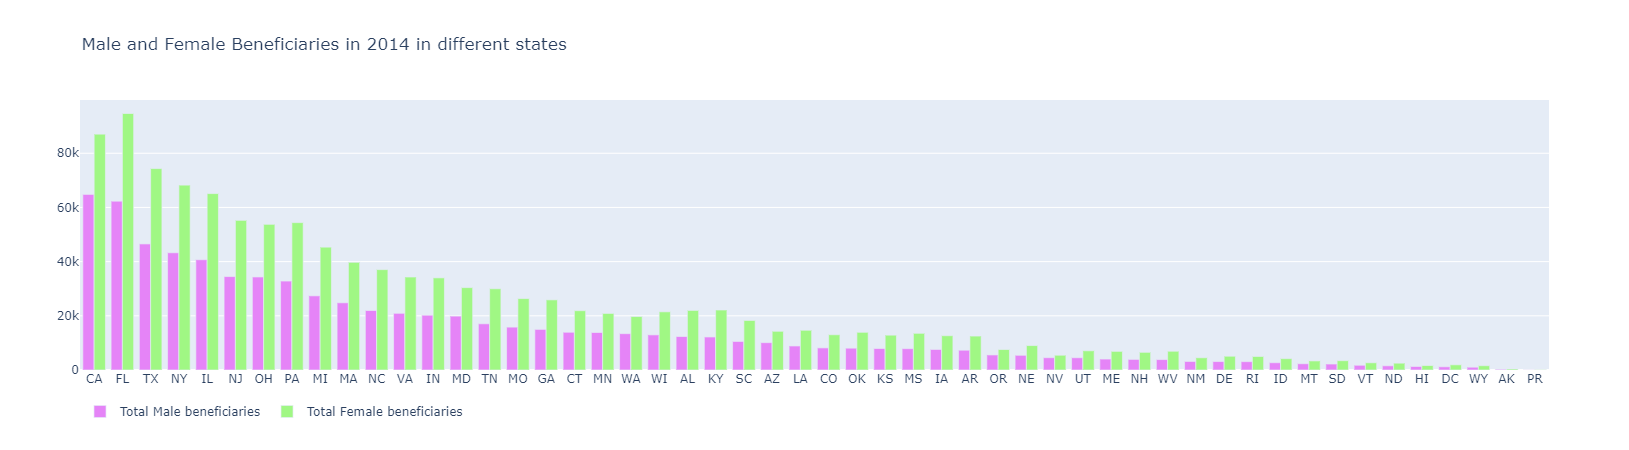

In [27]:
query14 = """SELECT
  state, Sum(male_beneficiaries) as male_ben, Sum(female_beneficiaries) as female_ben
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
      state
  ORDER BY
      male_ben DESC;
        """
response14 = medicare.query_to_pandas_safe(query14)


trace1 = go.Bar(
    x=response14.state,
    y=response14.male_ben,
    marker=dict(color='#e584f7'),
    name='Total Male beneficiaries'
)
trace2 = go.Bar(
    x=response14.state,
    y=response14.female_ben,
    marker=dict(color='#a0f784'),
    name='Total Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Male and Female Beneficiaries in 2014 in different states')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

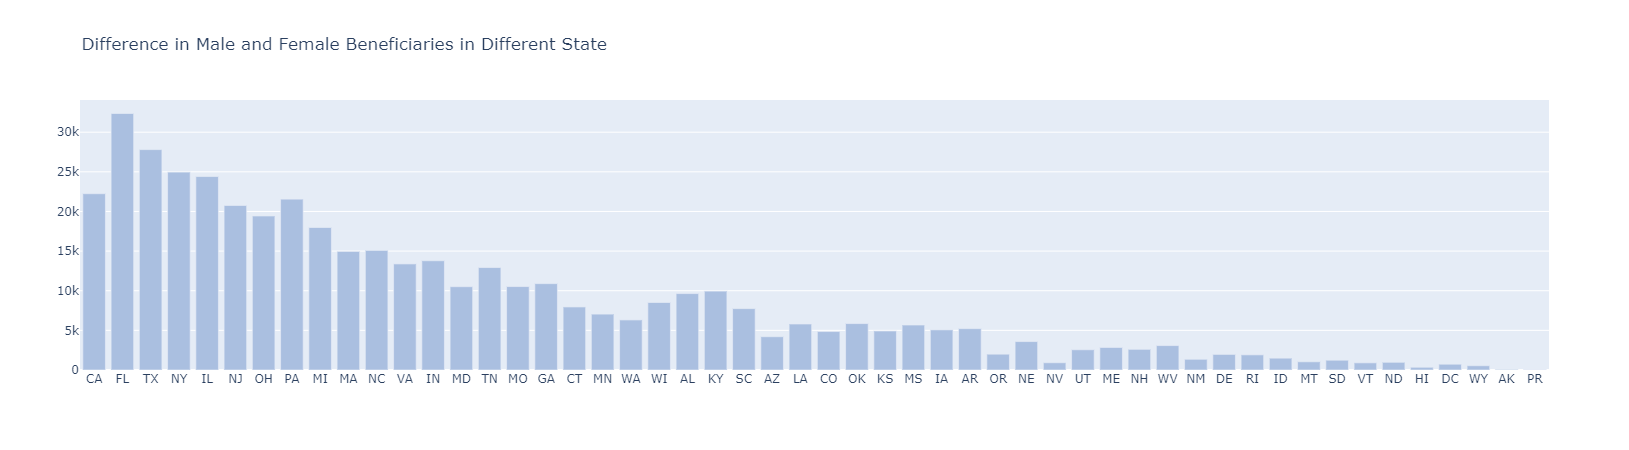

In [28]:
response14['difference'] = response14['female_ben'] - response14['male_ben']

trace1 = go.Bar(
    x=response14.state,
    y=response14.difference,
    marker=dict(color='#aabfe0'),
    name='Total Male beneficiaries'
)
data = [trace1]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Difference in Male and Female Beneficiaries in Different State')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')


Female beneficiaries in comaparison to male beneficiaries in Florida is the highest

## Length of Stay in diffferent facilities

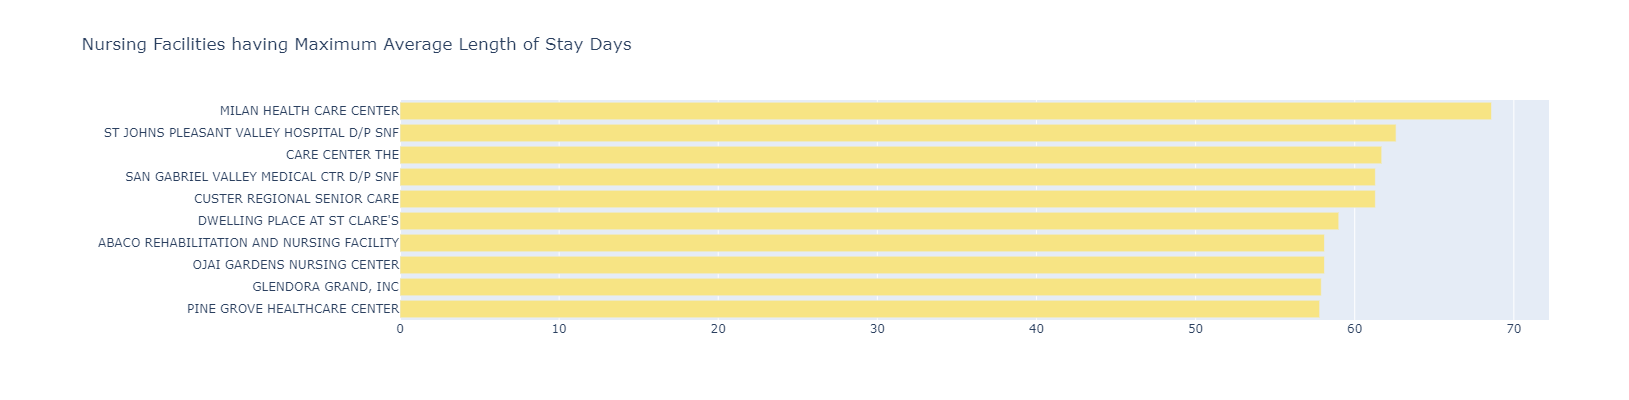

In [30]:
# which facilities have highest stays count 

query15 = """SELECT
  facility_name, city, state, average_length_of_stays_days
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
ORDER BY
  average_length_of_stays_days DESC;
        """
response15 = medicare.query_to_pandas_safe(query15)

tempdf = response15.head(10)
y = list(reversed(list(tempdf.facility_name)))
x = list(reversed(list(tempdf.average_length_of_stays_days)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f7e484'))
layout = dict(height=400, width=700, title='Nursing Facilities having Maximum Average Length of Stay Days', margin=dict(l=400))
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

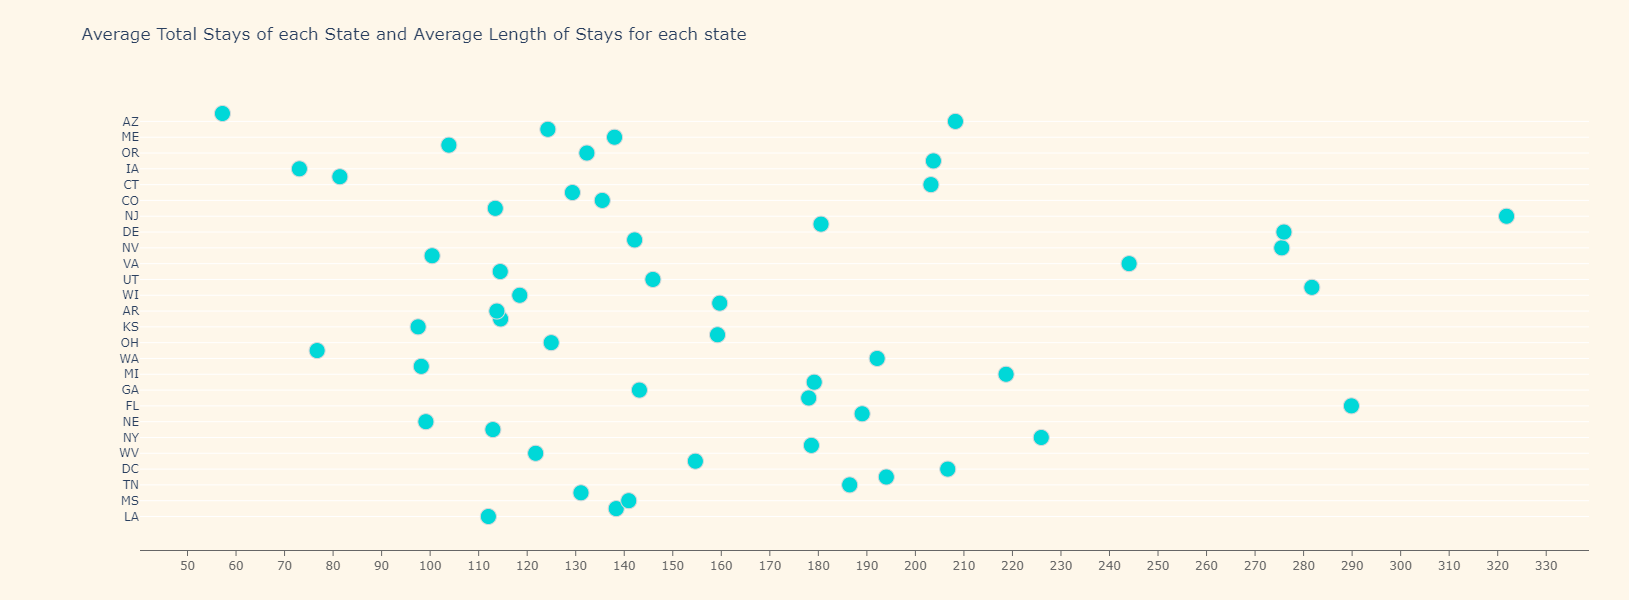

In [32]:
query16 = """SELECT
  state, AVG(average_length_of_stays_days) as average_length_of_stays_days, AVG(total_stays) as total_stays
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  average_length_of_stays_days DESC;
        """
response16 = medicare.query_to_pandas_safe(query16)
response16.head(10)


trace1 = go.Scatter(
    x=response16.total_stays,
    y=response16.state,
    mode='markers',
    name='Average of Total Stays in a State ',
    marker=dict(
        color='#00d8d8',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace1]
layout = go.Layout(
    title="Average Total Stays of each State for each state ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
#         autotick=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
#     width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

The lowest average total stay in Puerto Rico is the minimum at 57 days while New Jersey has the highest average total stay in New Jersey at 321

## Dividing nursing facilities in groups

In [36]:
import numpy as np 
from sklearn.cluster import KMeans 
query17 = """SELECT provider_id, facility_name, city, state, total_stays, distinct_beneficiaries_per_provider,
       average_length_of_stays_days, total_snf_charge_amount,
       total_snf_medicare_allowed_amount,
       total_snf_medicare_payment_amount,
       total_snf_medicare_standard_payment_amount, average_age,
       male_beneficiaries, female_beneficiaries, nondual_beneficiaries,
       dual_beneficiaries, white_beneficiaries, black_beneficiaries, average_hcc_score,
       percent_of_beneficiaries_with_atrial_fibrillation,
       percent_of_beneficiaries_with_asthma,
       percent_of_beneficiaries_with_cancer,
       percent_of_beneficiaries_with_chf,
       percent_of_beneficiaries_with_chronic_kidney_disease,
       percent_of_beneficiaries_with_copd,
       percent_of_beneficiaries_with_depression,
       percent_of_beneficiaries_with_diabetes,
       percent_of_beneficiaries_with_hyperlipidemia,
       percent_of_beneficiaries_with_ihd,
       percent_of_beneficiaries_with_osteoporosis,
       percent_of_beneficiaries_with_ra_oa,
       percent_of_beneficiaries_with_schizophrenia,
       percent_of_beneficiaries_with_stroke FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`;"""
response17 = medicare.query_to_pandas_safe(query17)

X = response17
X.index = X.provider_id
X = X.drop(['provider_id', 'facility_name', 'city', 'state'], axis=1)
X = X.dropna()
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
X['cluster'] = kmeans.fit_predict(X)

In [37]:
print ("Group A Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 0].index[:5])
temp = response17.loc[response1['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

print ("Group B Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 1].index[:5])
temp = response17.loc[response17['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()    

print ("Group C Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 2].index[:5])
temp = response17.loc[response17['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

print ("Group D Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 3].index[:5])
temp = response17.loc[response17['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1

Group A Cluster Elements: 
1 	 Washington Center For Comprehe, Seattle, Wa
2 	 Hilo Medical Center, Hilo, Hi
3 	 Linda Valley Care Center, Loma Linda, Ca
4 	 La Mariposa Care And Rehab Center, Fairfield, Ca
5 	 Eskaton Care Center Greenhaven, Sacramento, Ca

Group B Cluster Elements: 
1 	 Manorcare Health Services-Fair Oaks, Fairfax, Va
2 	 Kindred Transitional Care And Rehab-Tunnell Center, San Francisco, Ca
3 	 Washington Center, San Leandro, Ca
4 	 Silvercrest Center For Nursing And Rehabilitation, Jamaica, Ny
5 	 Diamond Ridge Healthcare Center, Pittsburg, Ca

Group C Cluster Elements: 
1 	 Heartland Health Care Center-Canton, Canton, Mi
2 	 Notting Hill Of West Bloomfield, W Bloomfield, Mi
3 	 Life Care Cent-Paradise Valley, Las Vegas, Nv
4 	 Care One At Teaneck, Teaneck, Nj
5 	 Eldorado Care Center, Llc, El Cajon, Ca

Group D Cluster Elements: 
1 	 Cherrydale Health And Rehabilitation Center, Arlington, Va
2 	 Coolidge House, Brookline, Ma
3 	 Gem Transitional, Pasadena, Ca
4 	 C

In [43]:
def generate_hist_plots(col):
    c1 = X[X['cluster'] == 0]
    trace1 = go.Histogram(x = c1[col]) 

    c2 = X[X['cluster'] == 1]
    trace2 = go.Histogram(x = c2[col]) 

    c3 = X[X['cluster'] == 2]
    trace3 = go.Histogram(x = c3[col]) 

    c4 = X[X['cluster'] == 3]
    trace4 = go.Histogram(x = c4[col]) 

    fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('Group A ' + col + ' distribution','Group B ' + col+ ' distribution','Group C ' + col+ ' distribution','Group D ' + col+ ' distribution'))
    fig.append_trace(trace1, 1, 1);
    fig.append_trace(trace2, 1, 2);
    fig.append_trace(trace3, 2, 1);
    fig.append_trace(trace4, 2, 2);
    fig['layout'].update(height=600, showlegend=False);
    iplot(fig, filename='simple-subplot');

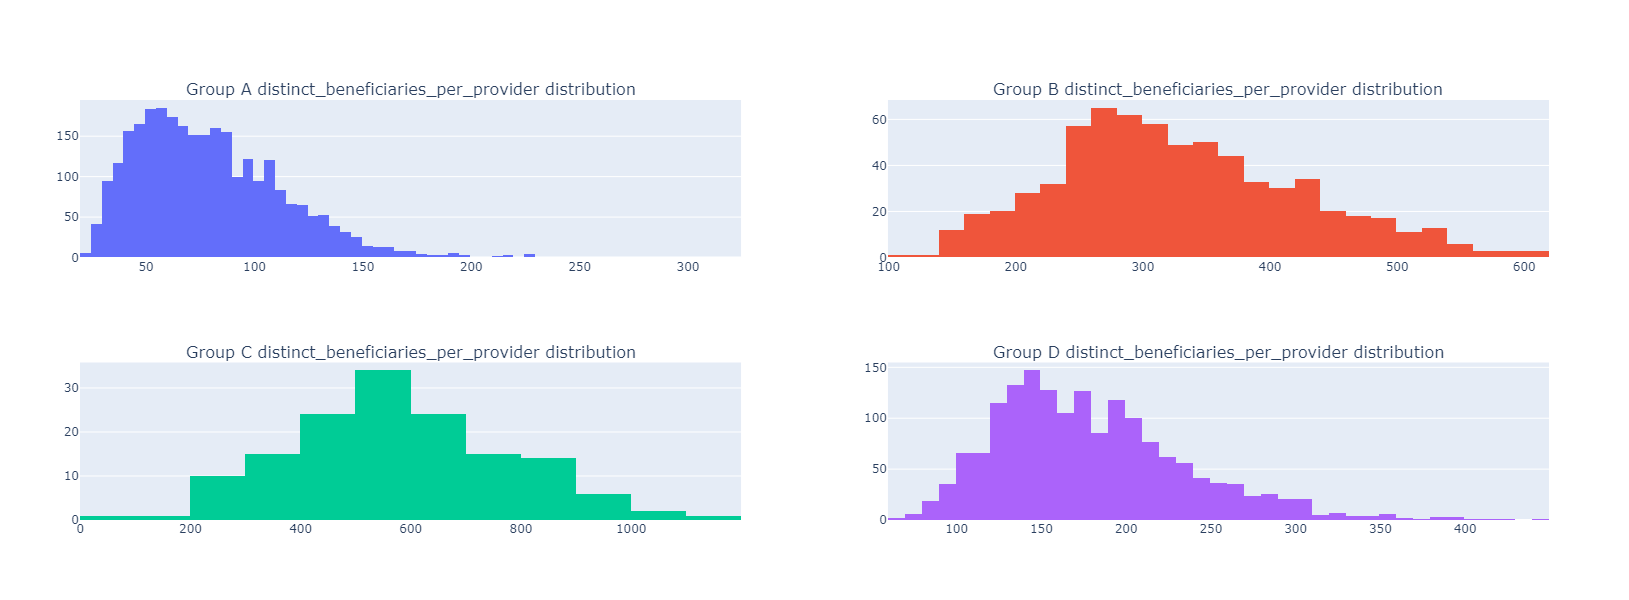

In [44]:
col = 'distinct_beneficiaries_per_provider'
generate_hist_plots(col)

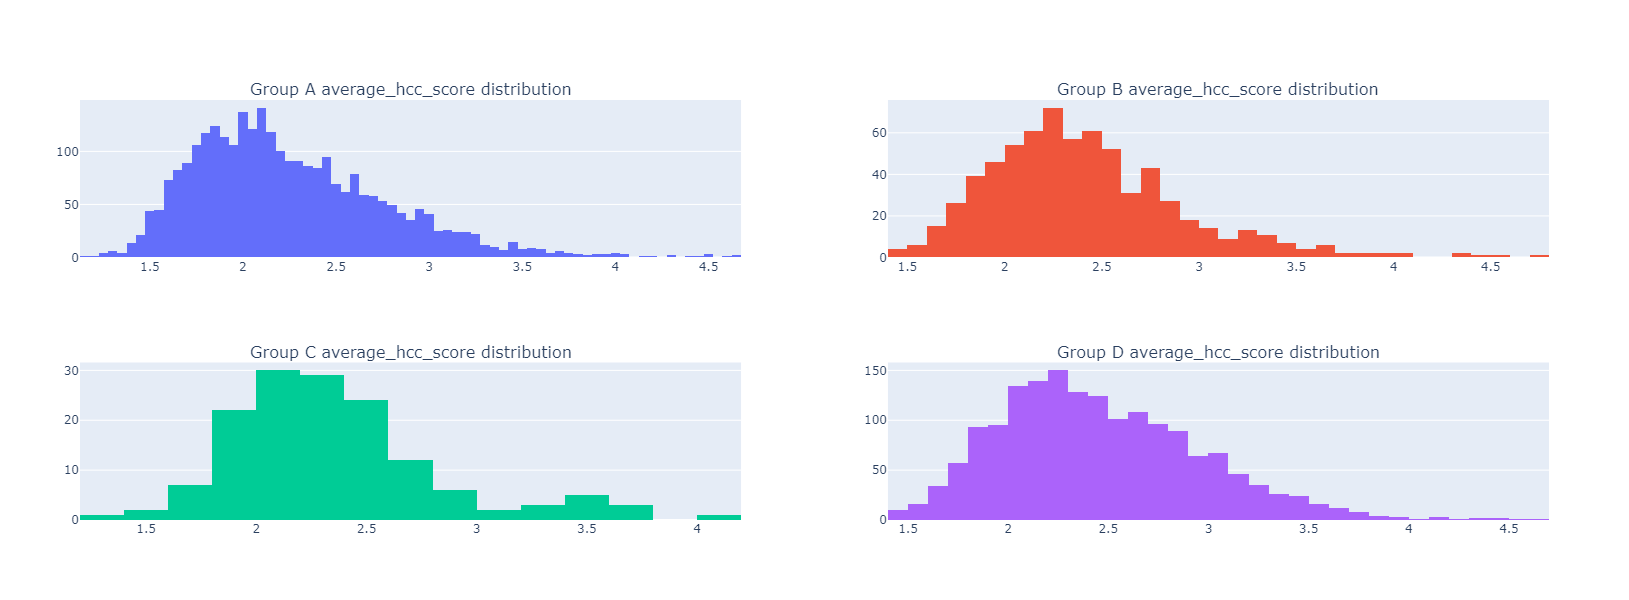

In [45]:
col = 'average_hcc_score'
generate_hist_plots(col)

Group D has nursing facilities with highest number of best performing facilities with low HCC score while Group C has the lowest number of good performing facilities although Group C has overall the least number of facilities in the distribution